## Clustering

In [1]:
import pandas as pd
import re
#from nltk.corpus import stopwords
import sklearn
#from sklearn.pipeline import Pipeline

#stopwords_rus = stopwords.words('russian')
from stop_words import get_stop_words
stopwords = get_stop_words('russian')
import numpy as np

In [2]:
from tqdm import tqdm

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Articles data

In [4]:
articles_df = pd.read_csv('articles_lemm_meta.tsv', sep = '\t', encoding = 'utf-8')

In [6]:
len(set(articles_df.final_rubrics))

19

In [5]:
articles_good_rubrics = articles_df[articles_df.final_rubrics != 'Мусор']
articles_good_rubrics = articles_good_rubrics.reset_index(drop = True)
articles_good_rubrics.shape

(24611, 13)

In [18]:
len(set(articles_good_rubrics.final_rubrics))

18

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import *
from sklearn.pipeline import *
from sklearn.preprocessing import Normalizer
from sklearn.metrics import *
from sklearn.cluster import *
import numpy as np

In [7]:
tfidf_vect = TfidfVectorizer(min_df = 2, stop_words = stopwords, max_features = 75000)#top 70% tfidf of vocabulary 
tfidf_vectorized = tfidf_vect.fit_transform(articles_good_rubrics.text)

## K-means

In [24]:
pipeline = Pipeline([
    #('vect', CountVectorizer(min_df = 2, stop_words = stopwords, max_features = 75000)),
    #('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components = 3000)),
    #('norm', Normalizer() ),
    ('clust', KMeans(n_clusters = 18, random_state = 42))
])


pipeline.fit(tfidf_vectorized)

Pipeline(memory=None,
     steps=[('svd', TruncatedSVD(algorithm='randomized', n_components=3000, n_iter=5,
       random_state=None, tol=0.0)), ('clust', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=18, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0))])

In [25]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = articles_good_rubrics.final_rubrics

print("Homogeneity:", homogeneity_score(labels, clust_labels))
print("Completeness:", completeness_score(labels, clust_labels))
print("V-measure",  v_measure_score(labels, clust_labels))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Homogeneity: 0.4077883764744641
Completeness: 0.395675549264585
V-measure 0.4016406578474096
Adjusted Rand-Index: 0.21652216895577167


In [26]:
print(clust_labels)

[14  7  5 ...  7  3  5]


In [16]:
confusion_matrix(labels, clust_labels)

ValueError: Mix of label input types (string and number)

In [27]:
for i in range(18):
    print(i)
    print(labels.groupby(clust_labels).value_counts()[i])
    print('\n')

0
final_rubrics
Космос         450
Физика          31
Футурология      4
История          1
Name: final_rubrics, dtype: int64


1
final_rubrics
Физика                 823
Технологии             432
Химия                  311
Космос                 126
Биология                97
Физиология человека     38
Науки о земле           33
Футурология             18
Математика              12
Computer Science        10
История                  6
Name: final_rubrics, dtype: int64


2
final_rubrics
История                556
Социология             328
Культура               272
Технологии             178
Экономика              172
Физиология человека    130
Философия              108
Психология             101
Computer Science        65
Математика              64
Физика                  64
Биология                60
Космос                  54
Политология             45
Язык                    45
Науки о земле           37
Футурология             29
Химия                   20
Name: final_rubrics, 

In [ ]:
sns.heatmap(data=confusion_matrix(labels, clust_labels), 
            annot=True, fmt="d", cbar=False)

#            , xticklabels=['male', 'female'], 
#                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

## Hierarchical clustering

In [30]:
pipeline2 = Pipeline([
    #('vect', CountVectorizer(min_df = 2, stop_words = stopwords, max_features = 75000)),
    #('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components = 1500)),
    #('norm', Normalizer() ),
    ('clust', AgglomerativeClustering(n_clusters = 18, affinity = 'euclidean')) 
])

pipeline2.fit(tfidf_vectorized)

Pipeline(memory=None,
     steps=[('svd', TruncatedSVD(algorithm='randomized', n_components=1500, n_iter=5,
       random_state=None, tol=0.0)), ('clust', AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=18,
            pooling_func=<function mean at 0x7ff32c908d08>))])

In [31]:
clust_labels2 = pipeline2.named_steps['clust'].labels_
#labels2 = articles_good_rubrics.final_rubrics

print("Homogeneity:", homogeneity_score(labels, clust_labels2))
print("Completeness:", completeness_score(labels, clust_labels2))
print("V-measure",  v_measure_score(labels, clust_labels2))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels2))

Homogeneity: 0.35088242047674745
Completeness: 0.35788221530484154
V-measure 0.35434775272969454
Adjusted Rand-Index: 0.18100658050869442


In [33]:
for i in range(18):
    print(i)
    print(labels.groupby(clust_labels2).value_counts()[i])
    print('\n')

0
final_rubrics
Физика                 490
Космос                  47
Технологии              40
Computer Science         6
Химия                    6
Физиология человека      5
Биология                 3
Математика               2
Футурология              2
Name: final_rubrics, dtype: int64


1
final_rubrics
Технологии          1022
Космос                64
Физика                10
История                5
Биология               3
Футурология            3
Computer Science       2
Науки о земле          2
Культура               1
Name: final_rubrics, dtype: int64


2
final_rubrics
Биология               2346
Физиология человека     928
Технологии              418
Психология              220
История                 176
Науки о земле           110
Культура                 72
Физика                   53
Социология               51
Химия                    50
Космос                   48
Computer Science         46
Язык                     35
Математика               23
Философия           

In [39]:
articles_good_rubrics.groupby(['final_rubrics']).size().sort_values(ascending = False)

final_rubrics
Технологии             5773
Космос                 4323
Биология               4049
История                2257
Физика                 1969
Физиология человека    1802
Культура                699
Науки о земле           575
Язык                    527
Химия                   506
Социология              464
Computer Science        421
Психология              380
Математика              249
Экономика               232
Футурология             188
Философия               142
Политология              55
dtype: int64

### Results

Общие (для двух методов):
1. Выделяется большой блок Технология (3000 текстов) + Космос, Физика 
2. Космос разбивается на несколько кластеров (1500, 800 + мелкие кластеры)
3. Выделяется блок гуманитарных наук (История, Социология, Культура, Экономика + Технологии)
4. Выделяется блок История + Биология
5. Выделяется блок Биология + Физиология
6. Выделяется блок Язык (300 текстов из 500)

K-means смешивает Технологии (3000) + Биология (2000) + Физика, Физиология, Космос <br>
Hierarchical clustering выдеялет 2 больших кластера Технологии + Космос+ Физика


In [9]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [8]:
pipeline3 = Pipeline([
    #('vect', CountVectorizer(min_df = 2, stop_words = stopwords, max_features = 75000)),
    #('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components = 1500)),
    #('norm', Normalizer() ),
    ('clust', AgglomerativeClustering(n_clusters = 18, affinity = 'euclidean')) 
])

pipeline3.fit(tfidf_vectorized)

Pipeline(memory=None,
     steps=[('svd', TruncatedSVD(algorithm='randomized', n_components=1500, n_iter=5,
       random_state=None, tol=0.0)), ('clust', AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=18,
            pooling_func=<function mean at 0x7f6cd8408d90>))])

In [13]:
clust_labels3 = pipeline3.named_steps['clust'].labels_

In [15]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.named_steps['clust'].children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [18]:
pipeline4 = Pipeline([
    #('vect', CountVectorizer(min_df = 2, stop_words = stopwords, max_features = 75000)),
    #('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components = 1500)),
    #('norm', Normalizer() ),
    ('clust', AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean')) 
])

pipeline4.fit(tfidf_vectorized)

Pipeline(memory=None,
     steps=[('svd', TruncatedSVD(algorithm='randomized', n_components=1500, n_iter=5,
       random_state=None, tol=0.0)), ('clust', AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func=<function mean at 0x7f6cd8408d90>))])

In [21]:
clust_labels4 = pipeline4.named_steps['clust'].labels_
labels = articles_good_rubrics.final_rubrics

print("Homogeneity:", homogeneity_score(labels, clust_labels4))
print("Completeness:", completeness_score(labels, clust_labels4))
print("V-measure",  v_measure_score(labels, clust_labels4))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels4))

Homogeneity: 0.2694003825075109
Completeness: 0.3762085566690345
V-measure 0.3139694106420096
Adjusted Rand-Index: 0.14105022747590876


In [22]:
for i in range(8):
    print(i)
    print(labels.groupby(clust_labels4).value_counts()[i])
    print('\n')

0
final_rubrics
Космос                 1025
Физика                  108
Футурология               8
Культура                  4
Технологии                4
Computer Science          3
Биология                  2
История                   1
Математика                1
Социология                1
Физиология человека       1
Name: final_rubrics, dtype: int64


1
final_rubrics
Космос                 2557
Физика                   52
Технологии               51
Футурология              49
Науки о земле            37
Биология                 16
История                  16
Химия                     8
Физиология человека       7
Культура                  5
Математика                2
Философия                 2
Computer Science          1
Психология                1
Экономика                 1
Name: final_rubrics, dtype: int64


2
final_rubrics
Технологии             3243
Биология               2155
История                1392
Физика                 1209
Космос                  486
Науки о земл

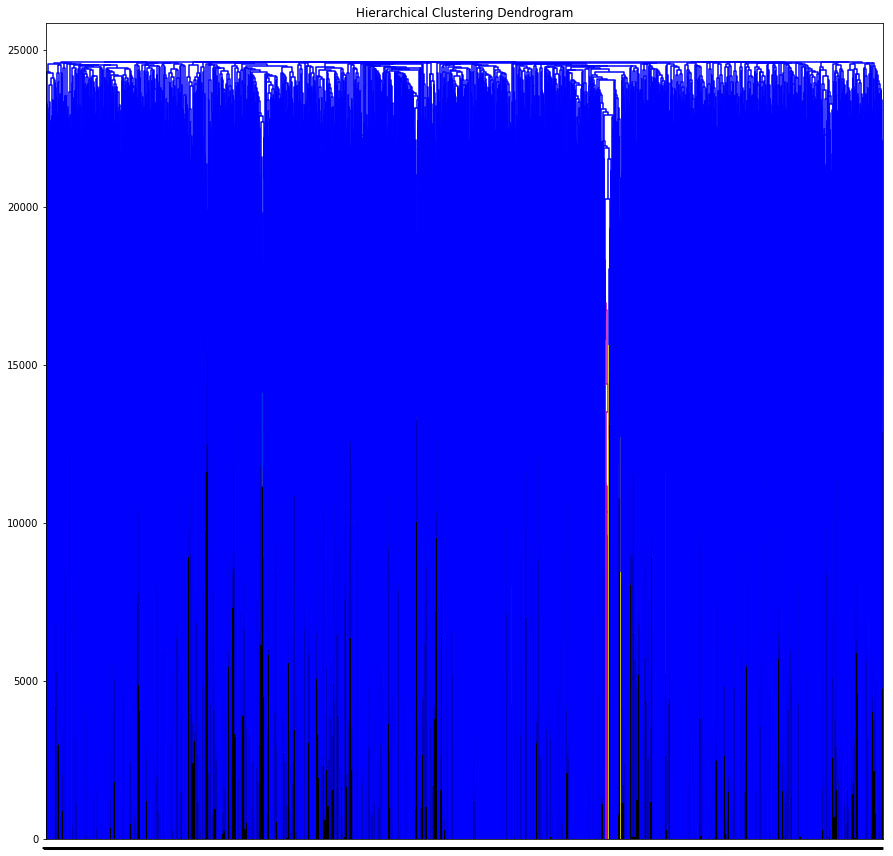

In [23]:
plt.figure(figsize=(15, 15))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(pipeline4, labels=clust_labels4)
plt.show()